In [3]:
import pandas as pd
import numpy as np
from bioinfokit.analys import norm
from rpy2 import robjects
from rpy2.robjects import r,pandas2ri
from rpy2.robjects.packages import importr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
from sklearn.decomposition import PCA
import shap
import math
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [4]:
metadata = pd.read_csv("metadata_GSE176307.csv", header=0)
tpm = pd.read_csv("GSE176307_tpm.csv", header=0,index_col=0) 
tpm = tpm[~tpm.index.duplicated()]
tpm = tpm.dropna()
tpm = tpm[tpm.mean(axis=1) > 0]
sam_1 = metadata[metadata["label"] == 1]["id"].tolist()
sam_0 = metadata[metadata["label"] == 0]["id"].tolist()
sam_all = sam_1 + sam_0
tpm = tpm[sam_all]
tpm2 = np.log2(tpm+1)
tpm2 = tpm2.transpose()

In [7]:
columns_to_check = ['FCRL1', 'CR1L', 'CD40LG', 'VPREB3', 'IRF4', 'NUGGC', 'NCR1', 'NKG7', 'FLT3', 'GP1BA', 'PNCK', 'KLRC1', 'FCRL3', 'CD19', 'PTPRCAP', 'CHI3L2', 'SLAMF8', 'TNFRSF13B', 'IL21R', 'CD7', 'SH2D1A', 'CXCR6', 'P2RY10', 'KLRC3', 'ARRDC5', 'CCDC141', 'SST', 'GPR171', 'SCIMP', 'TMEM156', 'PYHIN1', 'MIR650', 'LY9', 'IL12RB1', 'CR2', 'SIRPG', 'AMPD1', 'GZMH', 'SLAMF1', 'TNFRSF17', 'NCF1C', 'FCRL5', 'CXCL11', 'CTLA4', 'CCR5', 'CD6', 'PLA2G2D', 'IL12RB2', 'SPOCK2', 'CD226', 'GNLY', 'LAG3', 'CA9', 'CD72', 'MCOLN2', 'CCR2', 'CD5', 'ISG20', 'IL4I1', 'TNFSF13B', 'IL2RB', 'GPR65', 'CHRDL1', 'SALL1', 'PPP1R16B', 'DPT', 'HLA-DRB6', 'FAM26F', 'ICOS', 'PRKCQ', 'KLRC2', 'CD180', 'IL6', 'FDCSP', 'NCF1', 'ZBP1', 'PATL2', 'ACKR1', 'LILRB4', 'TTN', 'LPA', 'TOX', 'KLRC4', 'CYTH4', 'FAIM3', 'ZAP70', 'ACTC1', 'LOC100996809', 'TSPAN8', 'FAM65B', 'LGALS2', 'BIN2', 'LAX1', 'BLK', 'SASH3', 'TRAF3IP3', 'TRAT1', 'SIGLEC10', 'UGT1A8', 'LTB', 'CD22', 'ARHGAP9', 'UGT2B7', 'SHH', 'CLEC10A', 'GZMK', 'ACAP1', 'FABP6', 'CHP2', 'ZG16B', 'UGT1A3', 'MUC2', 'ALDH1L1', 'PIK3CG', 'GJB4', 'PARP15', 'ADAMDEC1', 'ANKRD44', '1-Sep', 'PRF1', 'CD79B', 'ITK', 'SELL', 'TMPRSS4', 'UGT1A5', 'TMC8', 'CAPN8', 'RASGRP1', 'TOX3', 'CD3G', 'CYP3A5', 'LCK', 'ANXA10', 'SEMA6A', 'SLAMF6', 'ATP2C2', 'CR1', 'CYP2J2', 'HLA-DRB3', 'BTBD16', 'CLCA4', 'CACNA1D', 'PLA2G2F', 'PRKCB', 'KLHL6', 'HAS3', 'NAPSB', 'NELL2', 'MMP10', 'GPX2', 'TAGAP', 'PTPRR', 'CSF2RB', 'CD8A', 'GVINP1', 'GPR174', 'SERPINB5', 'CD27', 'STAT4', 'FAM46C', 'RNF128', 'AMIGO2', 'UGT1A7', 'HSD17B2', 'CLCA2', 'SLAMF7', 'FMNL1', 'TCN1', 'RNASE6', 'CCND1', 'TNS4', 'CCL5', 'SLA', 'CCL21', 'ANXA8L1', 'MECOM', 'CD247', 'CAPNS2', 'CXCL9', 'IL2RA', 'PARVG', 'PTPN22', 'AKR1C2', 'MYO1G', 'S100A2', 'IDO1', 'FKBP5', 'UGT1A1', 'CD48', 'SPINK5', 'FCGR2C', 'DHRS2', 'BCL2A1', 'VAV1', 'TP63', 'ELK2AP', 'HLA-DMB', 'PSMB8-AS1', 'COL17A1', 'FAT2', 'DUOX1', 'GZMB', 'CCL18', 'PVRL1', 'SLITRK6', 'UGT1A10', 'MAP4K1', 'HMGCS2', 'ITM2A', 'CEL', 'CST7', 'MS4A1', 'KLRB1', 'PIK3AP1', 'CA12', 'SP140', 'EPHB6', 'HCST', 'PADI3', 'FCGR3A', 'BIRC3', 'TUSC3', 'FGFR3', 'AGR2', 'ICAM3', 'CST1', 'ITGAL', 'HIST1H3J', 'SLFN12L', 'CIITA', 'SEMA3F', 'UGT1A6', 'MPEG1', 'SLC14A1', 'IVL', 'MIR205HG', 'JAK3', 'ANXA8', 'FERMT1', 'ARHGAP25', 'SELPLG', 'PIM2', 'AKR1C1', 'HLA-DOB', 'CYP24A1', 'WDFY4', 'CD163', 'LAMP3', 'CCR4', 'PI3', 'LOC102723407', 'TNXB', 'CXCL13', 'TSPAN1', 'IRF6', 'KRT13', 'BCAM', 'SLC6A8', 'CD37', 'UGT1A9', 'CD38', 'SLC7A7', 'CHI3L1', 'SAMSN1', 'DOCK10', 'MS4A6A', 'CCL3', 'MZB1', 'AQP3', 'UPK1B', 'GZMA', 'SPINK1', 'CCL19', 'IL7R', 'S100A7', 'LAMB3', 'UGT1A4', 'TRIM29', 'NLRC5', 'HLA-F', 'IL2RG', 'CYP1B1', 'EPSTI1', 'PLEK', 'FGL2', 'WIPF1', 'CD79A', 'CXCL10', 'GPR183', 'ARHGAP15', 'EVI2B', 'SFRP4', 'C7', 'GBP4', 'CYTIP', 'BTK', 'GIMAP7', 'PTGDS', 'GBP5', 'ANKRD36BP2', 'WAS', 'SYNM', 'IRF8', 'IL10RA', 'CD3E', 'APBB1IP', 'SFRP2', 'FYB', 'DOCK11', 'TYMP', 'CD2', 'DES', 'RAC2', 'AOAH', 'CD53', 'ABI3BP', 'RGS1', 'HLA-DPB1', 'LOC102725018', 'CD52', 'DOCK2', 'PSMB9', 'MMP9', 'CORO1A', 'RARRES3', 'HLA-DRB1', 'ITGB2', 'HLA-DQA2', 'NCKAP1L', 'S100A8', 'LOC100293211', 'UBD', 'LOC100509457', 'LCP2', 'CCL4', 'CD3D', 'CCL2', 'LAPTM5', 'APOE', 'CXCR4', 'CFB', 'PTPRC', 'C1QB', 'S100A9', 'IGJ', 'C1QC', 'SRGN', 'FCER1G', 'IFI30', 'LCP1', 'IFITM1', 'CYBB', 'GBP1', 'HLA-DMA', 'HLA-DPA1', 'TAP1', 'KRT17', 'STAT1', 'IGLL5', 'C3', 'CD74', 'C1QA', 'LYZ', 'HLA-DRA', 'HLA-B']
overlapping_columns = [col for col in columns_to_check if col in tpm2.columns]
all_shap = tpm2[overlapping_columns]

shap.initjs()
model = xgboost.XGBClassifier(subsample =0.9, alpha = 2, eta = 0.1).fit(all_shap, [1] * 20+ [0] * 68)
explainer = shap.Explainer(model)
shap_values = explainer(all_shap)

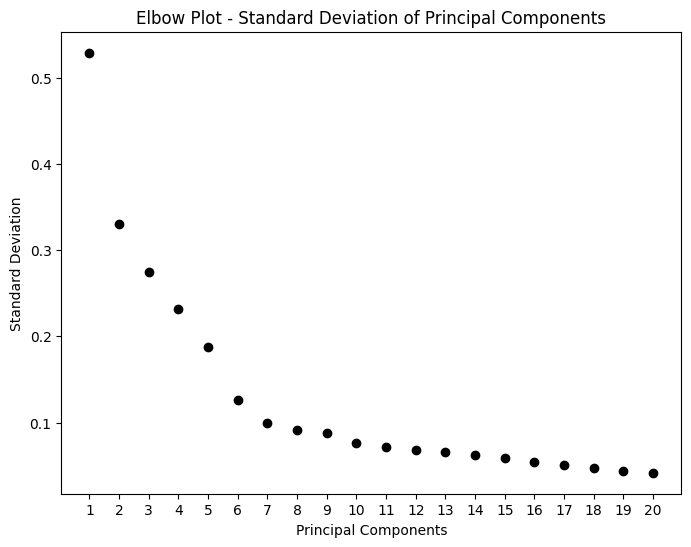

Principal Component 1 Standard Deviation: 0.5288035869598389
Principal Component 2 Standard Deviation: 0.33025285601615906
Principal Component 3 Standard Deviation: 0.2745024561882019
Principal Component 4 Standard Deviation: 0.231906920671463
Principal Component 5 Standard Deviation: 0.18797096610069275
Principal Component 6 Standard Deviation: 0.12645649909973145
Principal Component 7 Standard Deviation: 0.0996905043721199
Principal Component 8 Standard Deviation: 0.0913027673959732
Principal Component 9 Standard Deviation: 0.08776310086250305
Principal Component 10 Standard Deviation: 0.07615751773118973
Principal Component 11 Standard Deviation: 0.07157406210899353
Principal Component 12 Standard Deviation: 0.06824494153261185
Principal Component 13 Standard Deviation: 0.06549045443534851
Principal Component 14 Standard Deviation: 0.06220361962914467
Principal Component 15 Standard Deviation: 0.05854136869311333
Principal Component 16 Standard Deviation: 0.054551832377910614
Princi

In [8]:
num_components = 20
pca = PCA(n_components=num_components)
pca.fit(shap_values.values)
pca_components = pca.transform(shap_values.values)

std_deviation = np.std(pca_components, axis=0)
num_components = len(std_deviation)

plt.figure(figsize=(8, 6))
plt.scatter(range(1, num_components + 1), std_deviation, color='black', marker='o')
plt.title('Elbow Plot - Standard Deviation of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Standard Deviation')
plt.xticks(np.arange(1, num_components + 1))
plt.show()
for i, std in enumerate(std_deviation):
    print(f"Principal Component {i+1} Standard Deviation: {std}")

In [9]:
def SC_nSNN(A, k, sigma):
    data_size = A.shape[0]
    B = np.zeros((data_size, data_size))  # Create a similarity matrix which is fully connected

    # Compute similarity matrix using Gaussian function
    for i in range(data_size):
        for j in range(data_size):
            B[i, j] = np.exp(-np.sum((A[i, :] - A[j, :]) ** 2) / (2 * sigma ** 2))
            B[j, i] = B[i, j]

    temp = np.array([sorted(row, reverse=True) for row in B])  # Recording the distance in B from big to small
    I = np.argsort(-B, axis=1)  # I is the corresponding id

    for i in range(k, data_size):
        temp[:, i] = 0

    # E is the similarity matrix of the k nearest neighbors
    E = np.zeros((data_size, data_size))
    for i in range(data_size):
        for j in range(k):
            E[i, I[i, j]] = temp[i, j]

    E[np.where(E != 0)] = 1  # Replace nonzero sparse matrix elements with ones
    G = np.copy(E)

    W = np.zeros((data_size, data_size))  # W is the similarity matrix of the shared nearest neighbors

    for i in range(data_size):
        for j in range(i + 1, data_size):
            diff = np.sum(np.abs(G[i, :] - G[j, :])) / 2
            W[i, j] = k - diff
            if G[i, j] != 0 and G[j, i] != 0:
                W[i, j] += 1
            W[i, j] /= k
            W[j, i] = W[i, j]

    return W

def spectral_clustering(similarity_matrix, num_clusters):

    # Normalized Laplacian Matrix
    degrees = np.sum(similarity_matrix, axis=1)
    sqrt_degrees = np.sqrt(degrees)
    normalized_laplacian = np.diag(1.0 / sqrt_degrees) @ (np.diag(degrees) - similarity_matrix) @ np.diag(1.0 / sqrt_degrees)

    # Eigen Decomposition
    eigenvalues, eigenvectors = np.linalg.eig(normalized_laplacian)
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvectors = eigenvectors[:, sorted_indices[:num_clusters]]

    # K-means Clustering on Eigenvectors
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(np.real(sorted_eigenvectors))

    return clusters

similarity_matrix = SC_nSNN(pca_components[:, :5],55,1.5)
num_clusters =4
clusters_nr = spectral_clustering(similarity_matrix, num_clusters)
clusters = spectral_clustering(similarity_matrix, num_clusters)
for i in range(len(clusters)):
    if clusters[i] == 2:
        clusters[i] = 3
    elif clusters[i] == 3:
        clusters[i] = 2


def map_cluster_to_color(cluster):
    if cluster == 0:
        return "black"
    elif cluster == 2:
        return "brown"
    elif cluster == 1:
        return "purple"
    else:
        return "grey"

    
clusters_nr = [map_cluster_to_color(cluster) for cluster in clusters]

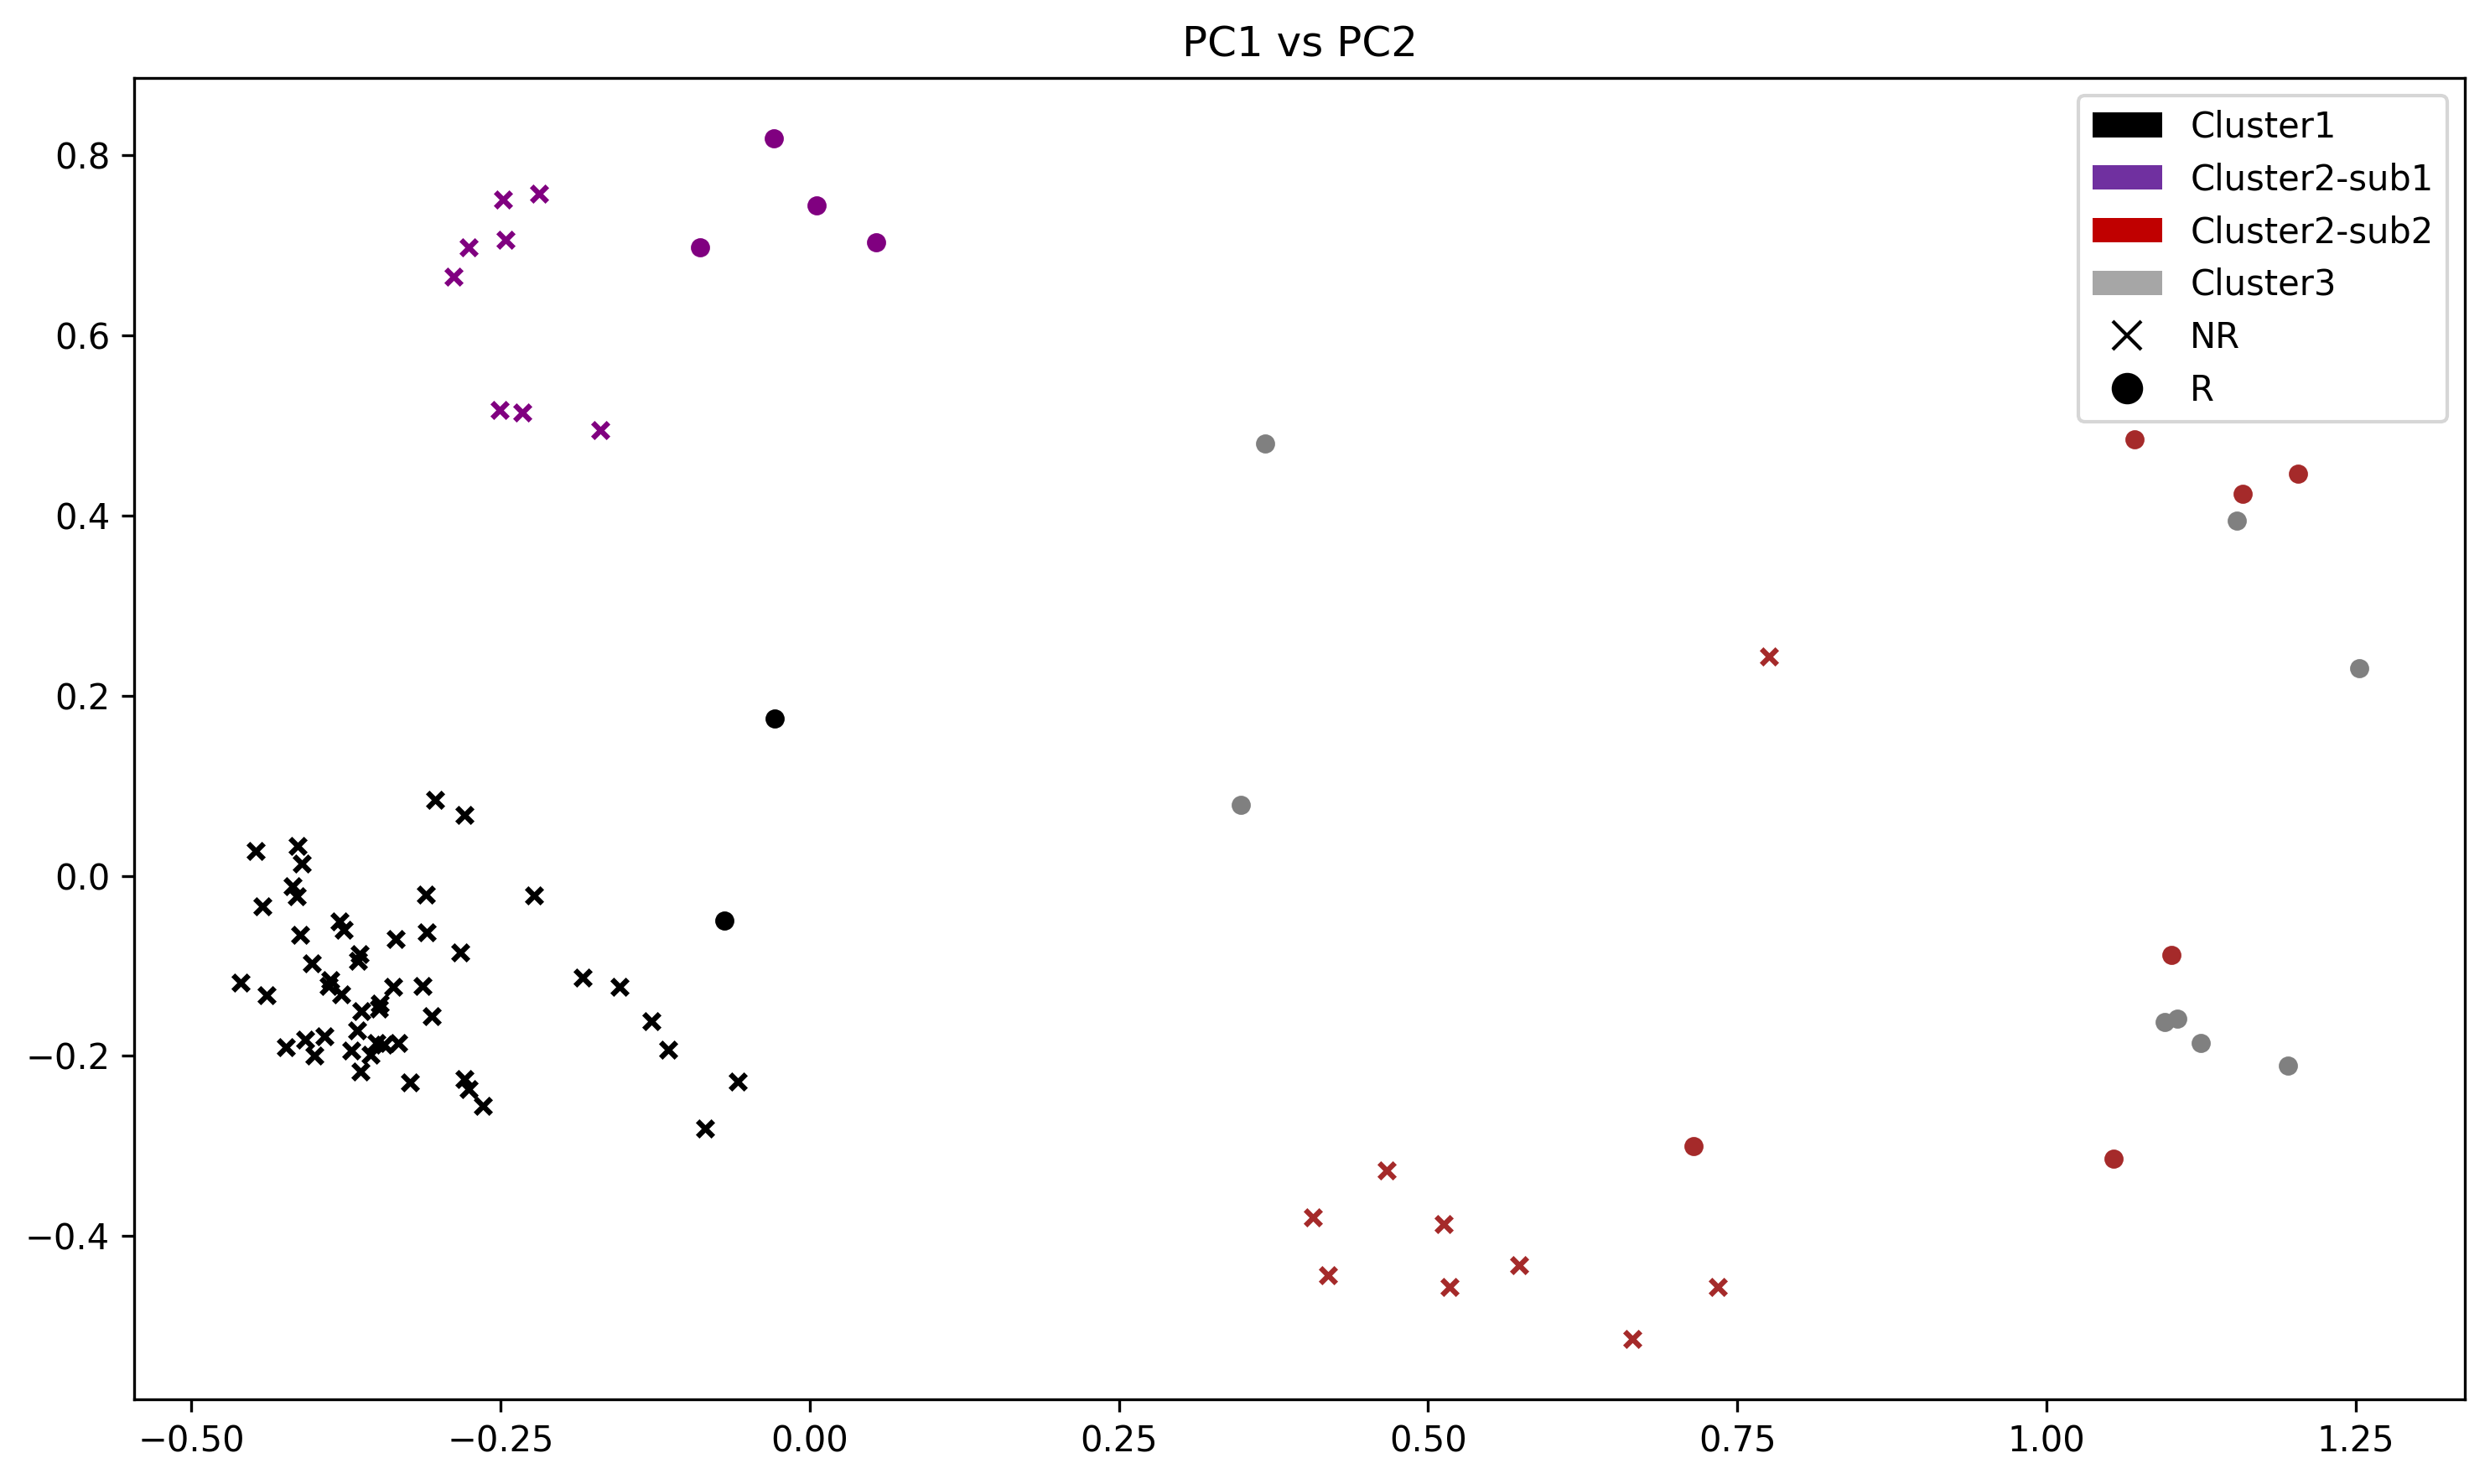

In [15]:
all_shap2 = shap_values.values

pca = PCA(n_components=20)
PCA_dat_all = pca.fit_transform(all_shap2)

color_all = clusters_nr
txt = [1] * 20 + [0] * 68  

def get_marker(value):
    return 'x' if value == 0 else 'o'

plt.figure(figsize=(10, 6), dpi=300)
for i in range(len(PCA_dat_all)):
    plt.scatter(PCA_dat_all[i, 0], PCA_dat_all[i, 1], color=color_all[i], marker=get_marker(txt[i]), s=20)
plt.title('PC1 vs PC2')
legend_elements = [
    mpatches.Rectangle((0, 0), 1, 0.4, facecolor="#000000", label='Cluster1'),
    mpatches.Rectangle((0, 0), 1, 0.4, facecolor="#7030A0", label='Cluster2-sub1'),
    mpatches.Rectangle((0, 0), 1, 0.4, facecolor="#C00000", label='Cluster2-sub2'),
    mpatches.Rectangle((0, 0), 1, 0.4, facecolor="#A6A6A6", label='Cluster3'),
    plt.Line2D([0], [0], marker='x', color='black', markersize=8, linestyle='None', label='NR'),
    plt.Line2D([0], [0], marker='o', color='black', markersize=8, linestyle='None', label='R')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=10)

plt.tight_layout()
plt.show()